In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### Logistic Regression

In [49]:
torch.manual_seed(1)

In [50]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [51]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [52]:
model = BinaryClassifier()

In [53]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

### Softmax Regression

In [54]:
z = torch.FloatTensor([1, 2, 3])

In [55]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [56]:
hypothesis.sum()

tensor(1.)

In [57]:
z = torch.rand(3, 5, requires_grad=True)

In [58]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2328, 0.1150, 0.2485, 0.1661, 0.2375],
        [0.1990, 0.1746, 0.2133, 0.1903, 0.2228],
        [0.1709, 0.2002, 0.1985, 0.2232, 0.2072]], grad_fn=<SoftmaxBackward>)


In [59]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([2, 1, 0])


In [60]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [61]:
print(y.unsqueeze(1))

tensor([[2],
        [1],
        [0]])


In [62]:
print(y_one_hot)

tensor([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])


In [63]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.6347, grad_fn=<MeanBackward0>)


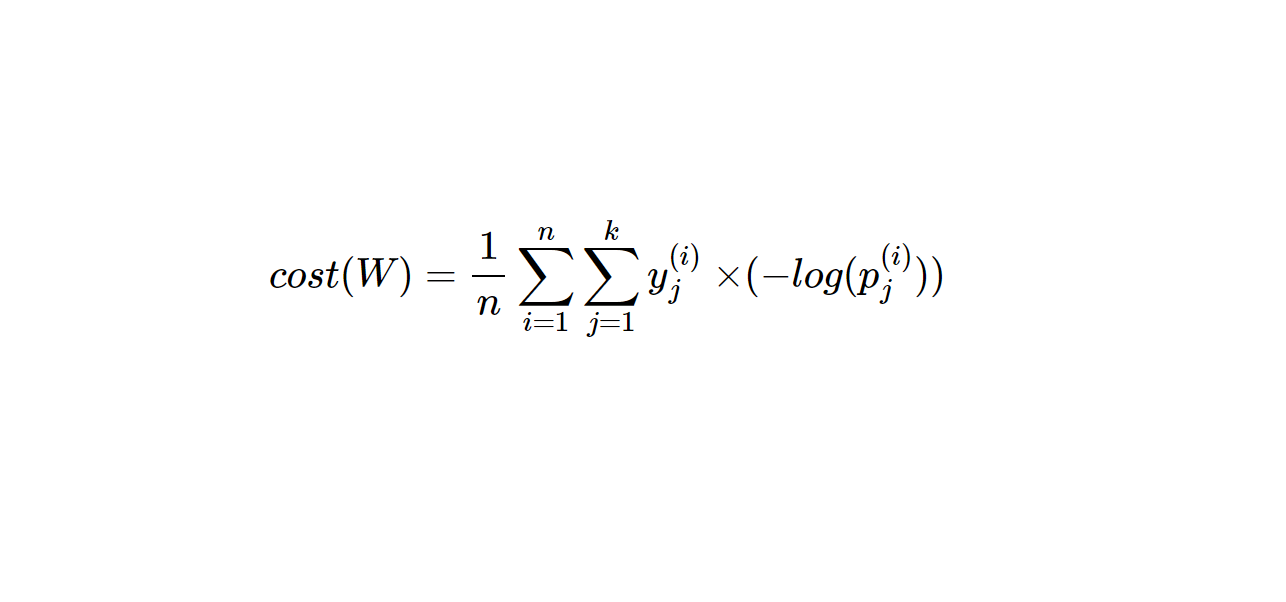

In [64]:
from IPython.display import Image
Image("softmax1.png")

#### high-level

In [65]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]], grad_fn=<LogBackward>)

In [66]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.4574, -2.1628, -1.3922, -1.7949, -1.4377],
        [-1.6144, -1.7452, -1.5452, -1.6593, -1.5013],
        [-1.7669, -1.6085, -1.6170, -1.4995, -1.5740]],
       grad_fn=<LogSoftmaxBackward>)

In [67]:
# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.6347, grad_fn=<MeanBackward0>)

In [68]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.6347, grad_fn=<MeanBackward0>)

In [69]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.6347, grad_fn=<NllLossBackward>)

In [70]:
# 네번째 수식
F.cross_entropy(z, y)

tensor(1.6347, grad_fn=<NllLossBackward>)

### Softmax Regression

In [71]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [72]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [73]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [74]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [75]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### high level

In [76]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### nn.module

In [77]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

In [78]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 4.661125
Epoch  100/1000 Cost: 0.711834
Epoch  200/1000 Cost: 0.630354
Epoch  300/1000 Cost: 0.573769
Epoch  400/1000 Cost: 0.523962
Epoch  500/1000 Cost: 0.476843
Epoch  600/1000 Cost: 0.430889
Epoch  700/1000 Cost: 0.385375
Epoch  800/1000 Cost: 0.339988
Epoch  900/1000 Cost: 0.295069
Epoch 1000/1000 Cost: 0.254579


#### class

In [79]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

In [80]:
model = SoftmaxClassifierModel()

In [81]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.777960
Epoch  100/1000 Cost: 0.654127
Epoch  200/1000 Cost: 0.561501
Epoch  300/1000 Cost: 0.505037
Epoch  400/1000 Cost: 0.460010
Epoch  500/1000 Cost: 0.420253
Epoch  600/1000 Cost: 0.383131
Epoch  700/1000 Cost: 0.347032
Epoch  800/1000 Cost: 0.310779
Epoch  900/1000 Cost: 0.274060
Epoch 1000/1000 Cost: 0.244281


- 과제 : Logistic regression과 Softmax Regression 함수 중 하나를 골라 Pure Python으로 구현하기(Sklearn, Tensorflow, Pytorch 쓰지 않고 정 안 되면 numpy까지는 사용 가능)

In [1]:
import pandas as pd
import numpy as np

# Sample data

In [2]:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Y = np.array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1])
w = 0.3

In [6]:
def logistic_regression(w,x):
    # x가 input으로 들어왔을 때 probability를 계산
    eps = 0.00001
    prob = 1/(1+np.exp(-np.dot(w,x))+eps)
    return np.array(prob)

def prediction(prob):
    preds = np.copy(prob)
    preds[preds>0.5]=1
    preds[preds<0.5]=0
    return preds

def cost(x,prob,y):
    # 예측 값과 label 사이의 cost
    m = len(prob)
    cost =-(1/m)*np.sum(label*-log(prob) + (1-label)*np.log(a-prob))
    return cost

def gradient(x, prob, y):
    # gradient값 계산
    m = len(prob)
    grad = (1/m)*np.sum((prob-y)*x)
    return grad

def w_update(x, y, w, lr = 1e-2):
    prob = logistic_regression(w,x)
    pred_y = prediction(prob)
    m = len(prob)
    grads = gradient(x, prob, y)
    w -= lr * grads
    return w, pred_y

In [7]:
for i in range(20):
    w, pred_y = w_update(X, Y, w)

In [9]:
w

0.22102565398064297